In [ ]:
# Exercise 6.9—Mini Project
# Solution from the book
from math import isclose
from random import uniform, random, randint

from datetime import datetime, timedelta

def random_time():
  return CarForSale.retrieved_date - timedelta(days=uniform(0,10))
def approx_equal_time(t1, t2):
  test = datetime.now()
  return isclose((test-t1).total_seconds(), (test-t2).total_seconds())
def random_car():
  return CarForSale(randint(1990,2019), randint(0,250000), 27000. * random(), random_time())
def approx_equal_car(c1,c2):
  return (isclose(c1.model_year,c2.model_year) and isclose(c1.mileage,c2.mileage)
                  and isclose(c1.price, c2.price)
                  and approx_equal_time(c1.posted_datetime, c2.posted_datetime))
for i in range(0,100):
  a,b = random_scalar(), random_scalar()
  u,v,w = random_car(), random_car(), random_car()
  test(CarForSale.zero(), approx_equal_car, a,b,u,v,w)

In [ ]:
# Somethin must be done
from abc import ABCMeta, abstractmethod, abstractproperty

def random_scalar():
  return uniform(-10,10)

def test(zero, eq, a, b, u, v, w):
  assert eq(u + v, v + u)
  assert eq(u + (v + w), (u + v) + w)
  assert eq(a * (b * v), (a * b) * v)
  assert eq(1 * v, v)
  assert eq((a + b) * v, a * v + b * v)
  assert eq(a * v + a * w, a * (v + w))
  assert eq(zero + v, v)
  assert eq((-1) * v + v, zero)
  assert eq(0 * v, zero)
  assert eq(1 * v, v)



class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod    #1
    @abstractproperty #2
    def zero():
        pass
    def __neg__(self): #3
        return self.scale(-1)
    def __truediv__(self, scalar):
        return self.scale(1.0/scalar)

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

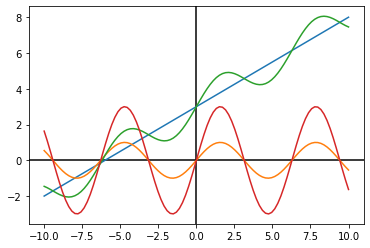

In [ ]:
# Exercise 6.10
from math import sin
import matplotlib as plt
# Solution from the book
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

class Function(Vector):
  def __init__(self, f):
    self.function = f
  def add(self, other):
    return Function(lambda x: self.function(x) + other.function(x))
  def scale(self, scalar):
    return Function(lambda x: scalar * self.function(x))
  @classmethod
  def zero(cls):
    return Function(lambda x: 0)
  def __call__(self, arg):
    return self.function(arg)
f = Function(lambda x: 0.5 * x + 3)
g = Function(sin)
plot([f, g, f+g, 3*g], -10, 10)

In [ ]:
# Exercise 6.11—Mini Project
# Soulution from the book
def approx_equal_function(f,g):
  results = []
  for _ in range(0,10):
    x = uniform(-10,10)
    results.append(isclose(f(x),g(x)))
  return all(results)
# I do not think that code above checks functions equality but it is dead-level for me

In [ ]:
# Exercise 6.12—Mini Project
# Solution from the book
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
    def _repr_latex_(self):
        monomials = [repr(coefficient) if power == 0 
                               else "x ^ {%d}" % power if coefficient == 1
                               else "%s x ^ {%d}" % (coefficient,power) 
                               for (power,coefficient) in enumerate(self.coefficients) 
                               if coefficient != 0]
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

def random_function():
  degree = randint(0,5)
  p = Polynomial(*[uniform(-10,10) for _ in range(0,degree)])
  return Function(lambda x: p(x))
for i in range(0,100):
  a,b = random_scalar(), random_scalar()
  u,v,w = random_function(), random_function(), random_function()
  test(Function.zero(), approx_equal_function, a,b,u,v,w)

In [ ]:
for _ in range(5):
  degree = randint(0,5)
  print(degree, Polynomial(*[uniform(-10,10) for _ in range(0,degree)]))

1 <__main__.Polynomial object at 0x7fd4e22097d0>
3 <__main__.Polynomial object at 0x7fd4e2262890>
2 <__main__.Polynomial object at 0x7fd4e2262890>
0 <__main__.Polynomial object at 0x7fd4e2262890>
2 <__main__.Polynomial object at 0x7fd4e2262890>


In [ ]:
p = Polynomial(*[uniform(-10,10) for _ in range(0,degree)])
p(0), p(1), p(2)

(-4.116491977752885, -6.744228347826857, -9.371964717900829)

In [ ]:
uniform(-10,10)

0.06441623823490339

In [ ]:
# Exercise 6.13—Mini Project
# Solution from the book
class Function(Vector):
  def __init__(self, f):
    self.function = f
  def add(self, other):
    return Function(lambda x,y: self.function(x,y) + other.function(x,y))
  def scale(self, scalar):
    return Function(lambda x,y: scalar * self.function(x,y))
  @classmethod
  def zero(cls):
    return Function(lambda x,y: 0)
  def __call__(self, *args):
    return self.function(*args)

In [ ]:
f = Function(lambda x,y:x+y)
g = Function(lambda x,y: x-y+1)
(f+g)(3,10)

7

In [ ]:
# Exercise 6.15—Mini Project
# Maybe book is awesome, but still have a filling that there a lot of gaps in the narrative
# Solution from the book
class Matrix(Vector):
  @abstractproperty
  def rows(self):
    pass
  @abstractproperty
  def columns(self):
    pass
  def __init__(self,entries):
    self.entries = entries
  def add(self,other):
    return self.__class__(tuple(tuple(self.entries[i][j] + other.entries[i][j]
                          for j in range(0,self.columns()))
                          for i in range(0,self.rows())))
  def scale(self,scalar):
    return self.__class__(tuple(tuple(scalar * e for e in row)
                          for row in self.entries))
  def __repr__(self):
    return "%s%r" % (self.__class__.__qualname__, self.entries)
  def zero(self):
    return self.__class__(tuple(tuple(0 for i in range(0,self.columns()))
                          for j in range(0,self.rows())))

In [ ]:
# Exercise 6.17—Mini Project
class LinearMap3d_to_5d(Vector):
  def _init_(self, m5_by_3):
    self.input_matrix = m5_by_3
  def __call__(self):
    return self.__class__(tuple(tuple(self.entries[j][i]
                          for j in range(0,self.columns()))
                          for i in range(0,self.rows())))